**PRODIGY INFOTECH**

**Author: Mansi Jadhav**

**Data Science Intern**

Task - 03: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioural data. Use a dataset such as Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
from google.colab import files
upload=files.upload()

Saving IBM.csv to IBM.csv


In [2]:
import pandas as pd
url='/content/IBM.csv'
data=pd.read_csv(url,encoding='latin1')

In [3]:
data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany', 'Gender', 'OverTime'],
      dtype='object')

In [4]:
#checking data type & non-null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
 13  Gender                   1470 non-null   object
 14  OverTime                 1470 non-null  

In [5]:
#SHAPE OF DATASET
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])

Rows: 1470
Columns: 15


In [6]:
#CHECKING FOR UNIQUE VALUES IN THE DATASET
data.nunique()

Age                          43
Attrition                     2
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EnvironmentSatisfaction       4
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
WorkLifeBalance               4
YearsAtCompany               37
Gender                        2
OverTime                      2
dtype: int64

In [7]:
#Generate summary statistics and transpose the result
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


Understanding distribution of target variable

In [8]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

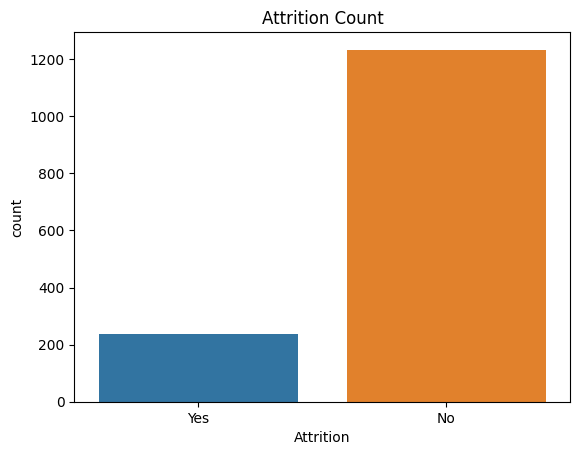

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data, x='Attrition')
plt.title('Attrition Count')
plt.show()

Understanding Categorical variables

In [10]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Attrition', 'Department', 'EducationField', 'MaritalStatus', 'Gender', 'OverTime']


In [11]:
#all the categorical columns with their values -
cols=data.describe(include="O").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(data[i].unique())
    print("")

Distinct_values :
 'column_name' = Attrition
['Yes' 'No']

Distinct_values :
 'column_name' = Department
['Sales' 'Research & Development' 'Human Resources']

Distinct_values :
 'column_name' = EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Distinct_values :
 'column_name' = MaritalStatus
['Single' 'Married' 'Divorced']

Distinct_values :
 'column_name' = Gender
['Female' 'Male']

Distinct_values :
 'column_name' = OverTime
['Yes' 'No']



In [12]:
#checking number of categorical data as per their columns
for var in categorical:

    print(data[var].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Male      883
Female    587
Name: Gender, dtype: int64
No     1055
Yes     415
Name: OverTime, dtype: int64


Understanding numerical variable

In [13]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 9 numerical variables

The numerical variables are : ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany']


In [14]:
data[numerical].head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,2,4,5993,8,1,6
1,49,8,1,3,2,5130,1,3,10
2,37,2,2,4,3,2090,6,3,0
3,33,3,4,4,3,2909,1,3,8
4,27,2,1,1,2,3468,9,3,2


Missing Value Detection for all columns

In [15]:
data.isnull()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Gender,OverTime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
Gender                     0
OverTime                   0
dtype: int64

Since, all the values are 0, so there is no need to perform the step of feeding missing values

In [17]:
#Checking relationship among attributes
data.corr()

<ipython-input-17-e17a2ed64f60>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


<ipython-input-18-ea78da4bdd81>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='BuPu',annot=True)


<Axes: >

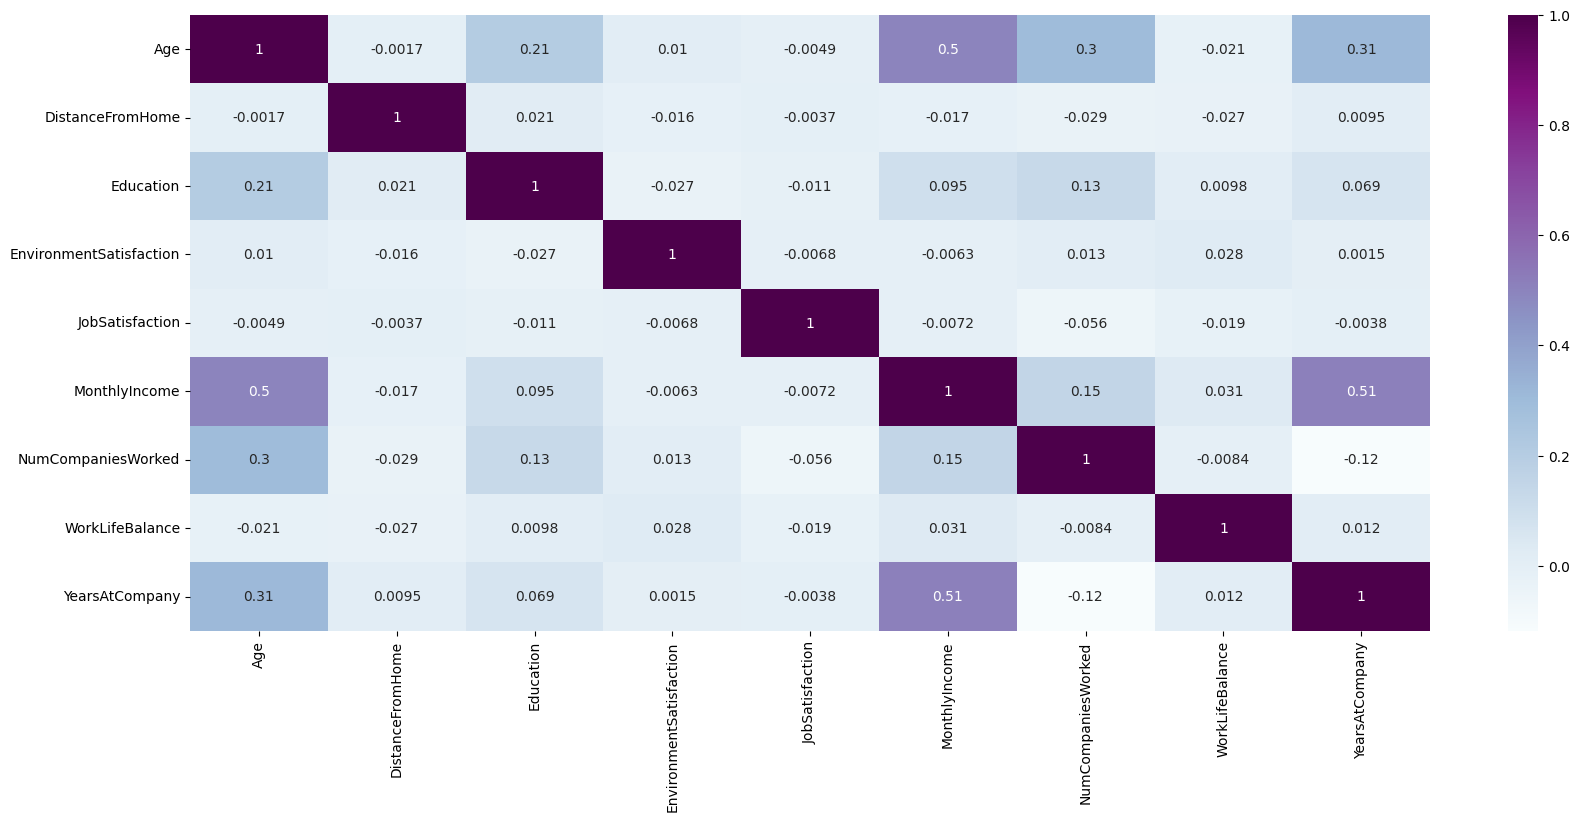

In [18]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),cmap='BuPu',annot=True)

Segregating Numerical and Categorical Attributes

In [19]:
data_cat = data.select_dtypes('object')
data_num = data.select_dtypes(exclude='object')

In [20]:
data_cat.head()

,Attrition,Department,EducationField,MaritalStatus,Gender,OverTime
0,Yes,Sales,Life Sciences,Single,Female,Yes
1,No,Research & Development,Life Sciences,Married,Male,No
2,Yes,Research & Development,Other,Single,Male,Yes
3,No,Research & Development,Life Sciences,Married,Female,Yes
4,No,Research & Development,Medical,Married,Male,No


In [21]:
data_num.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,2,4,5993,8,1,6
1,49,8,1,3,2,5130,1,3,10
2,37,2,2,4,3,2090,6,3,0
3,33,3,4,4,3,2909,1,3,8
4,27,2,1,1,2,3468,9,3,2


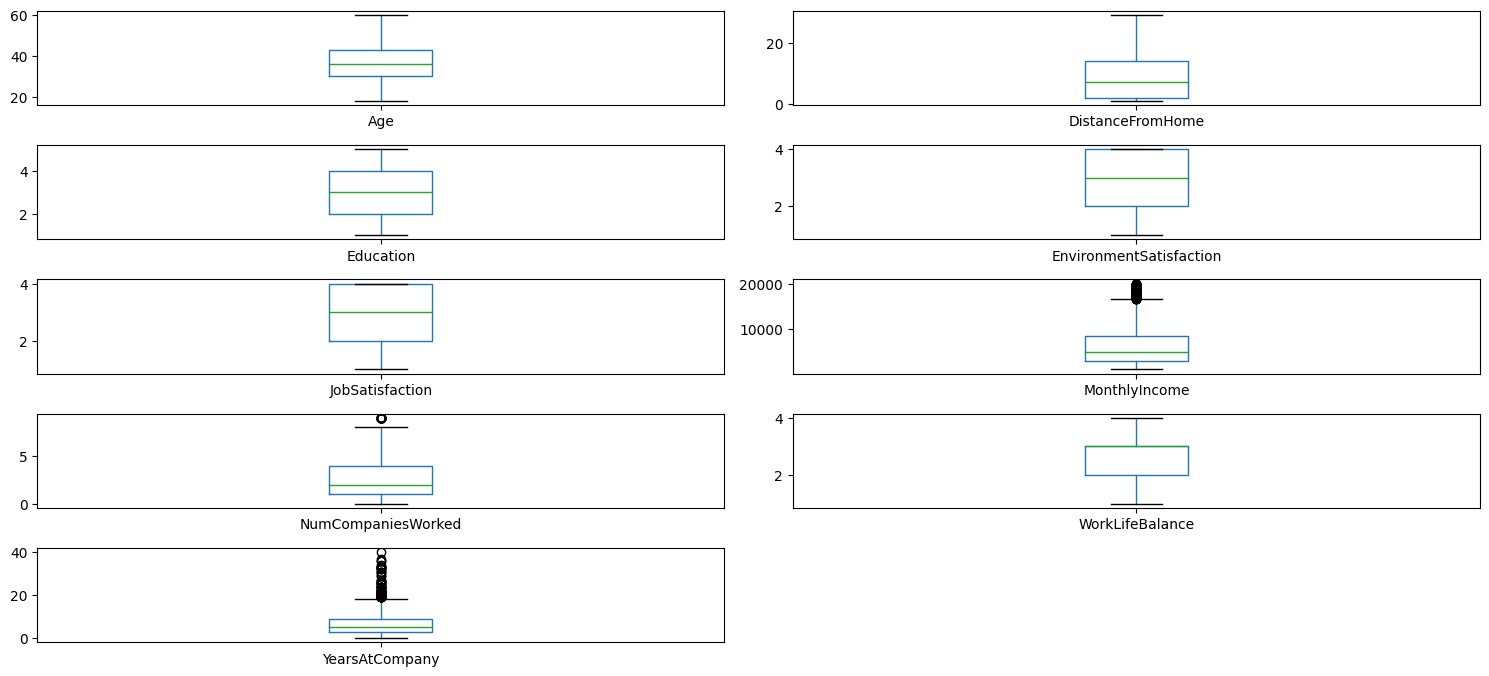

In [22]:
#Using Boxplot to detect the outliers-
plt.figure(figsize=(15,12))

for i ,col in enumerate(list(data_num.columns)):
    plt.subplot(9,2,i+1)
    data_num.boxplot(col)
    plt.grid()
    plt.tight_layout()

The box plot here indicates the interquartile range, that is, the top line of the box is the third quartile and the bottom line of the box is the second quartile. The line separating the second and third quartiles indicates the median. The lines outside of the box indicate the outer-quartiles

From the above box plots we can see that the Age & Monthly Income columns have outliers whereas other columns do not.

In [23]:
#Treating outliers using IQR
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
lower_limit,upper_limit=q1-(1.5*IQR),q3+(1.5*IQR)
data = data[~((data<lower_limit)|(data>upper_limit)).any(axis=1)]
data.shape

<ipython-input-23-1d7e7475c200>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-23-1d7e7475c200>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-23-1d7e7475c200>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data<lower_limit)|(data>upper_limit)).any(axis=1)]


(1259, 15)

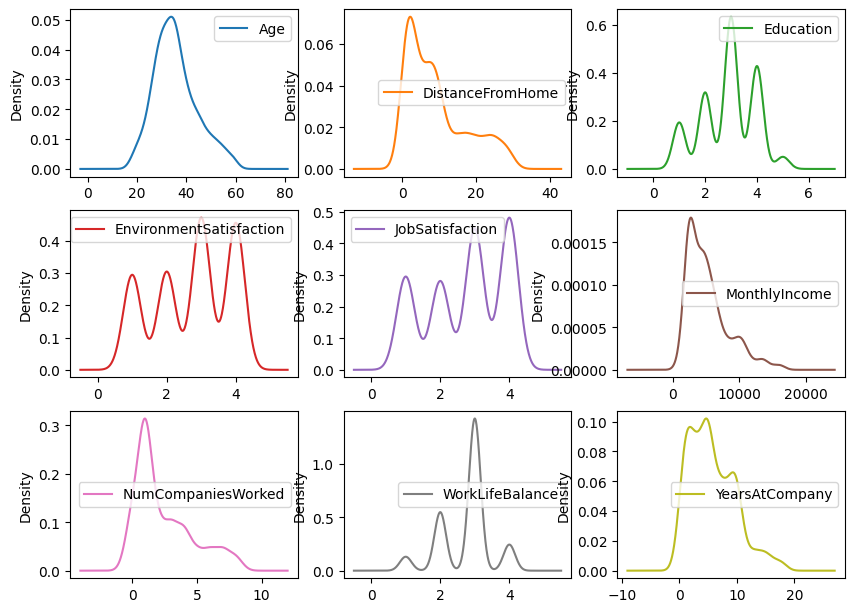

In [24]:
data.plot(kind='kde', subplots=True, sharex=False, layout=(4,3), legend = True, figsize=(10,10))
plt.show()

In [25]:
# checking the skewness coefficient to determine the transformation
for i in data_num.columns:
    sk = data_num[i].skew()
    print(i,"  has the skewness coeff of :",sk)

# skew coeff should lie between [-1,1]

Age   has the skewness coeff of : 0.4132863018563338
DistanceFromHome   has the skewness coeff of : 0.9581179956568269
Education   has the skewness coeff of : -0.2896810819684331
EnvironmentSatisfaction   has the skewness coeff of : -0.32165444773937907
JobSatisfaction   has the skewness coeff of : -0.3296719586636647
MonthlyIncome   has the skewness coeff of : 1.3698166808390662
NumCompaniesWorked   has the skewness coeff of : 1.026471111968205
WorkLifeBalance   has the skewness coeff of : -0.5524802990965146
YearsAtCompany   has the skewness coeff of : 1.7645294543422085


EDA

1) Univariate Analysis

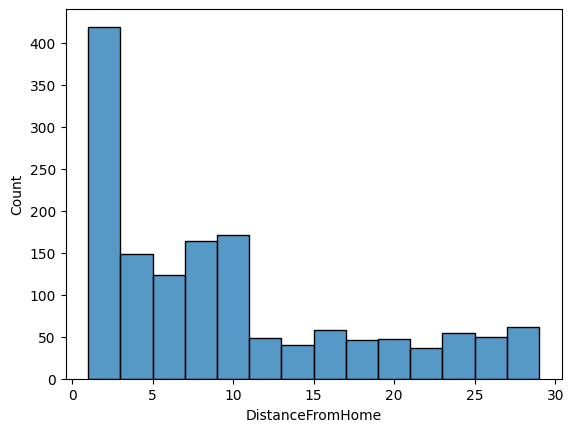

In [26]:
sns.histplot(data_num.DistanceFromHome)
plt.show()

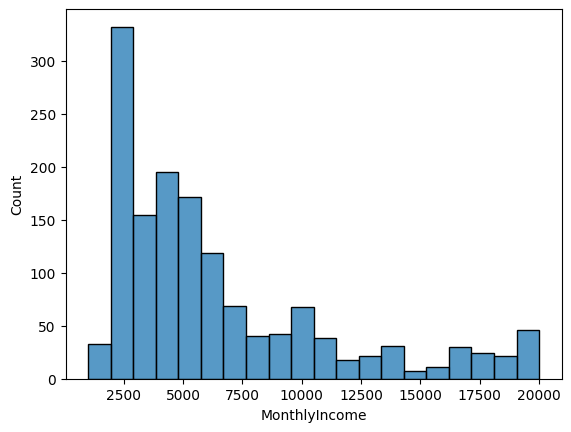

In [27]:
sns.histplot(data_num.MonthlyIncome)
plt.show()

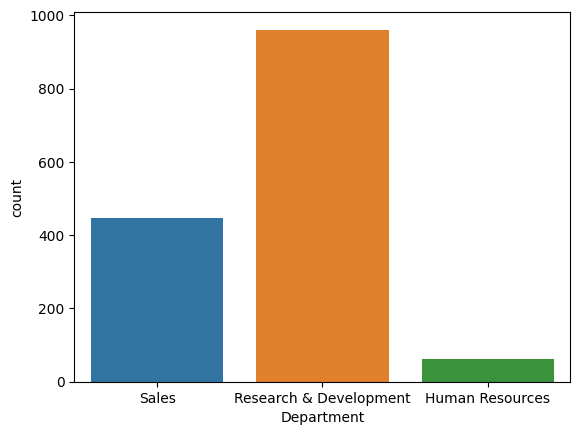

In [28]:
sns.countplot(data=data_cat, x='Department')
plt.show()

2) Bivariate Analysis

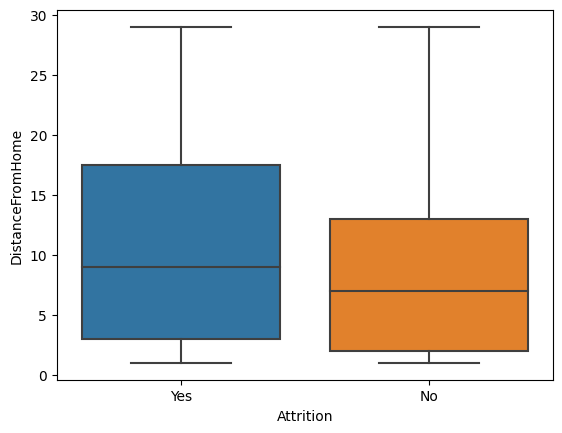

In [29]:
sns.boxplot(x='Attrition',y = 'DistanceFromHome',data = data)
plt.show()

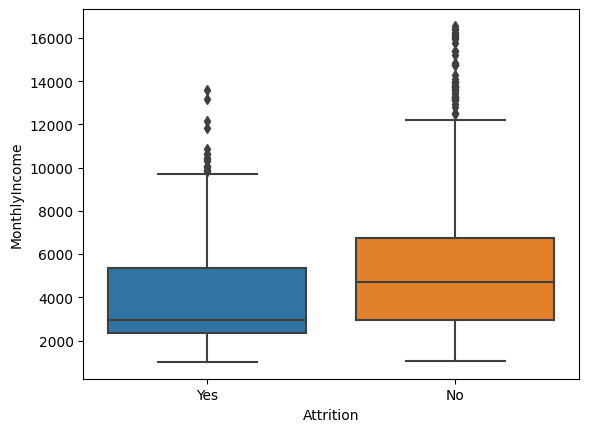

In [30]:
sns.boxplot(x='Attrition',y = 'MonthlyIncome',data = data)
plt.show()

In [31]:
pd.crosstab(data_cat.Attrition,data_cat.MaritalStatus)

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


<Axes: xlabel='Age', ylabel='count'>

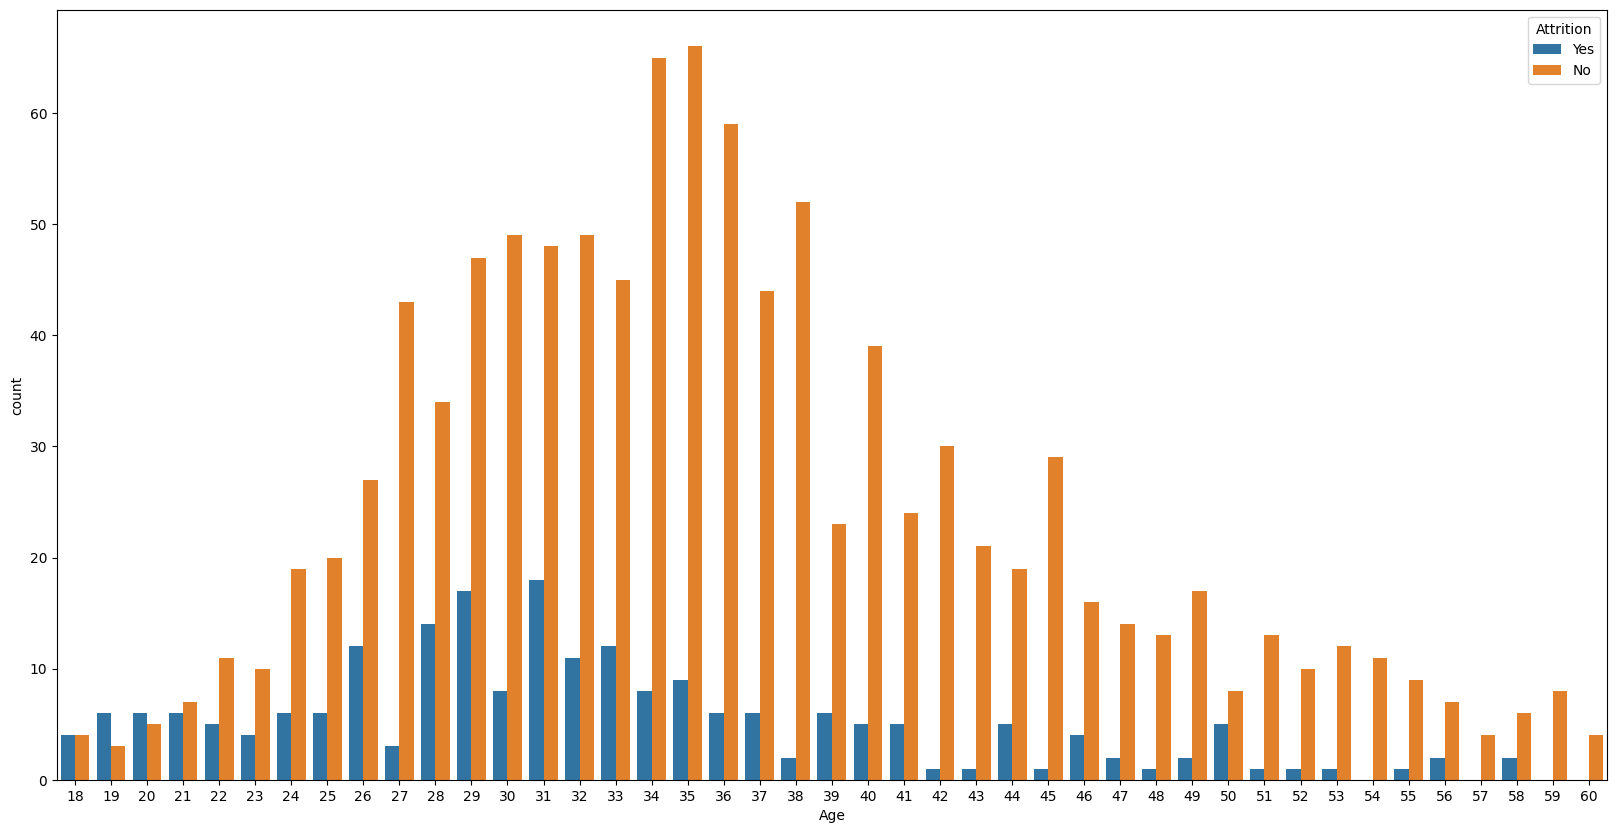

In [32]:
#Age based attrition of employees
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Attrition',data=data)

Text(0.5, 1.0, 'Monthly income of employees according to their Age')

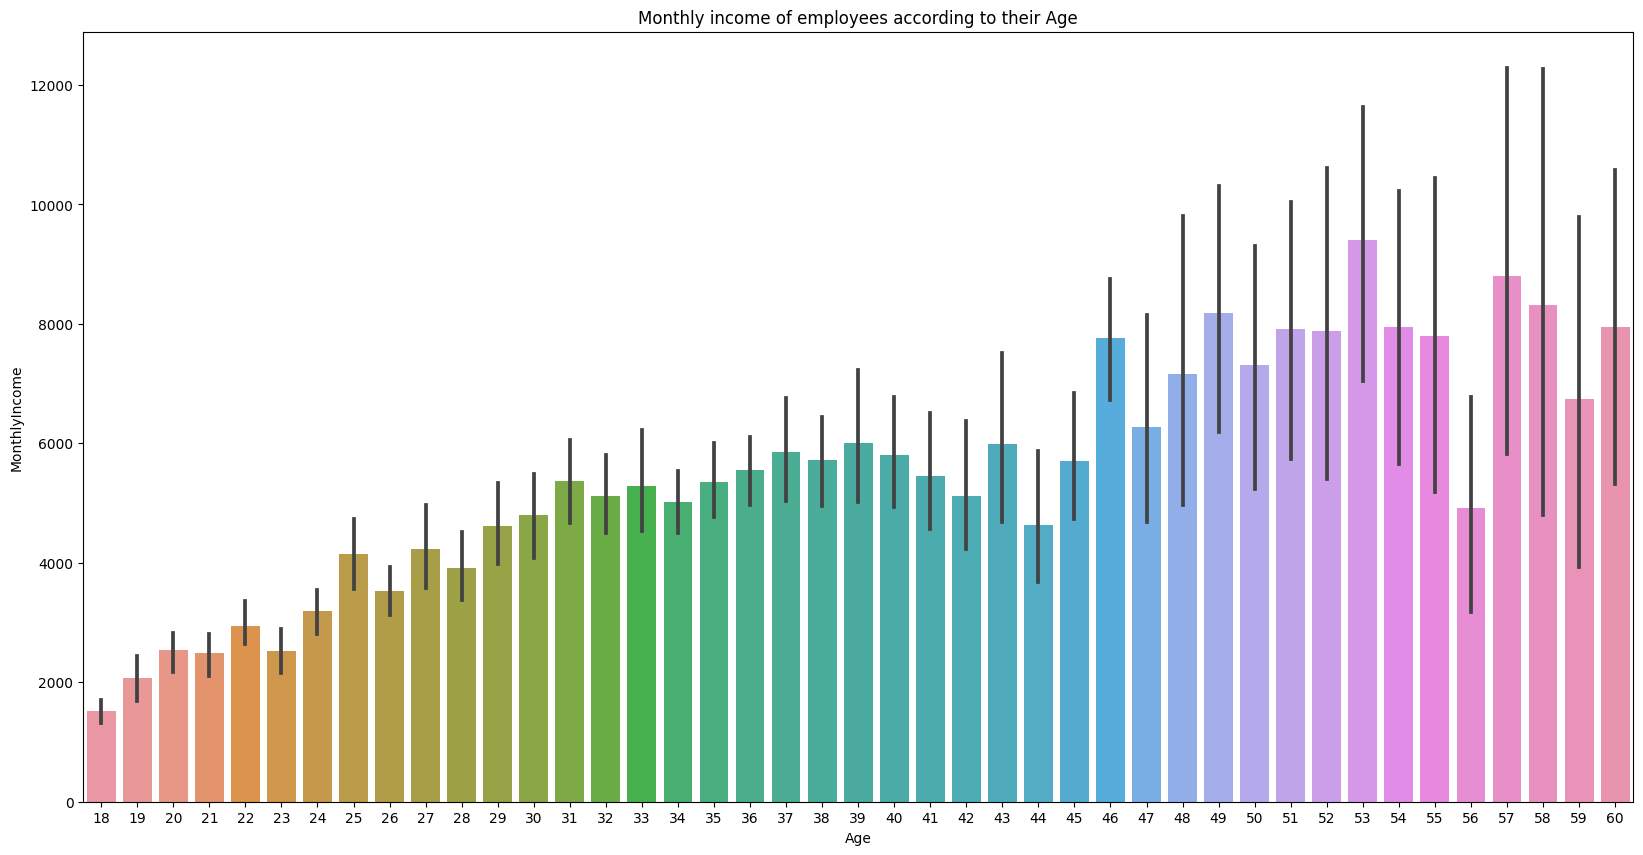

In [33]:
#Monthly income of the employees acc to age
import numpy as np
plt.figure(figsize=(20,10))
sns.barplot(x='Age',y='MonthlyIncome',data=data,estimator=np.mean)
plt.title('Monthly income of employees according to their Age')

Text(0.5, 1.0, 'Departments of employess')

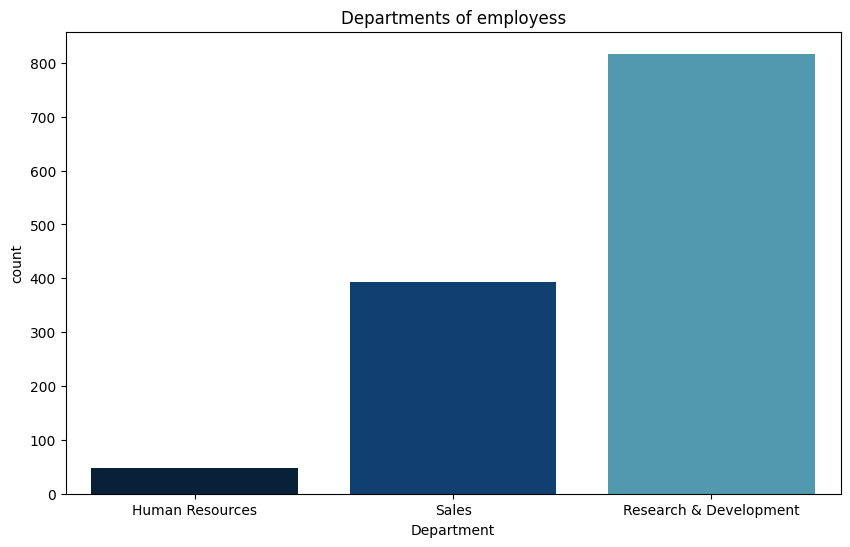

In [34]:
# Departmental Attrition of Employees
plt.figure(figsize=(10,6))
sns.countplot(data=data,x=data['Department'],order=data['Department'].value_counts().sort_values(ascending=True).index, palette='ocean')
plt.title('Departments of employess')

Text(0.5, 1.0, 'Attrition based on education field of the employee')

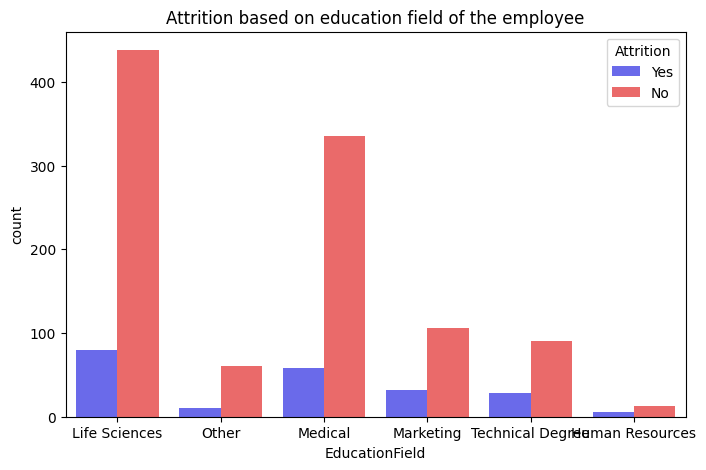

In [35]:
#Attrition based on gender of the employee
plt.figure(figsize=(8,5))
sns.countplot(x='EducationField',hue='Attrition',data=data, palette= 'seismic')
plt.title("Attrition based on education field of the employee")

Text(0.5, 1.0, 'Attrition by EducationField')

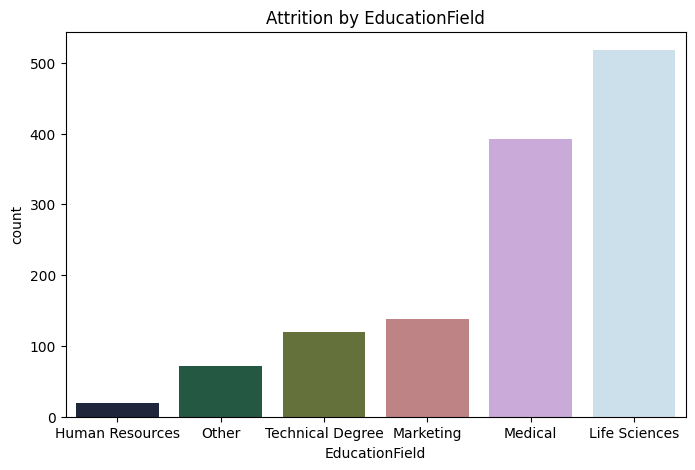

In [36]:
#Distribution of employees by the education field
plt.figure(figsize=(8,5))
sns.countplot(data=data,x=data['EducationField'], order=data['EducationField'].value_counts().sort_values(ascending=True).index, palette = 'cubehelix')
plt.title('Attrition by EducationField')

Text(0.5, 1.0, 'MaritalStatus of the employees')

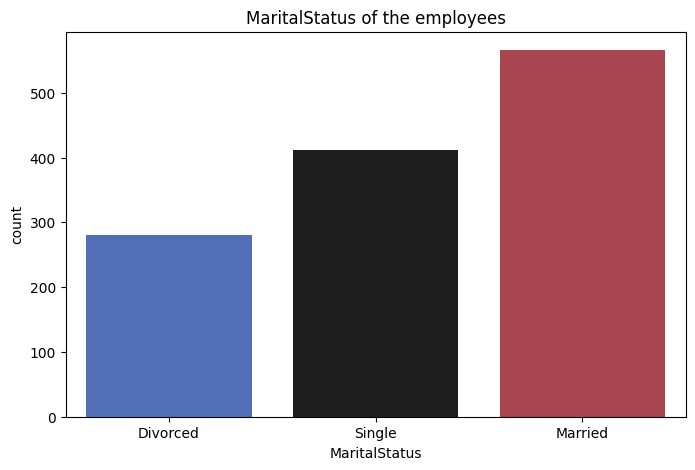

In [37]:
# number of married and unmarried employees
plt.figure(figsize=(8,5))
sns.countplot(x=data['MaritalStatus'], order= data['MaritalStatus'].value_counts().sort_values(ascending=True).index, palette = 'icefire')
plt.title('MaritalStatus of the employees')

Text(0.5, 1.0, 'Attrition based on gender of the employee')

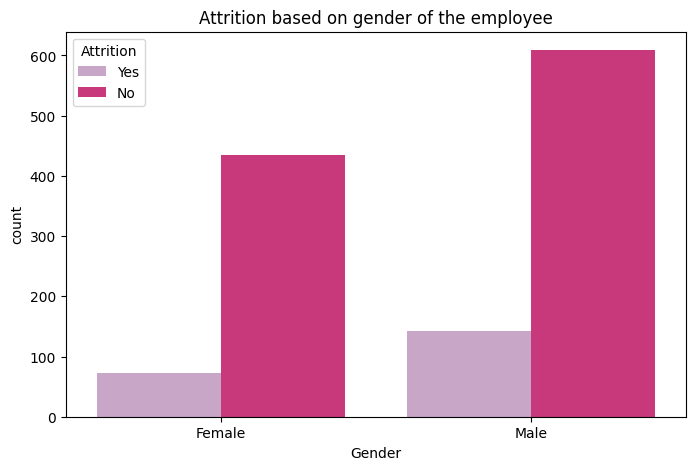

In [38]:
#Attrition based on gender of the employee
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',hue='Attrition',data=data, palette= 'PuRd')
plt.title("Attrition based on gender of the employee")

Text(0.5, 1.0, 'Attrition based on job satisfaction of the employees')

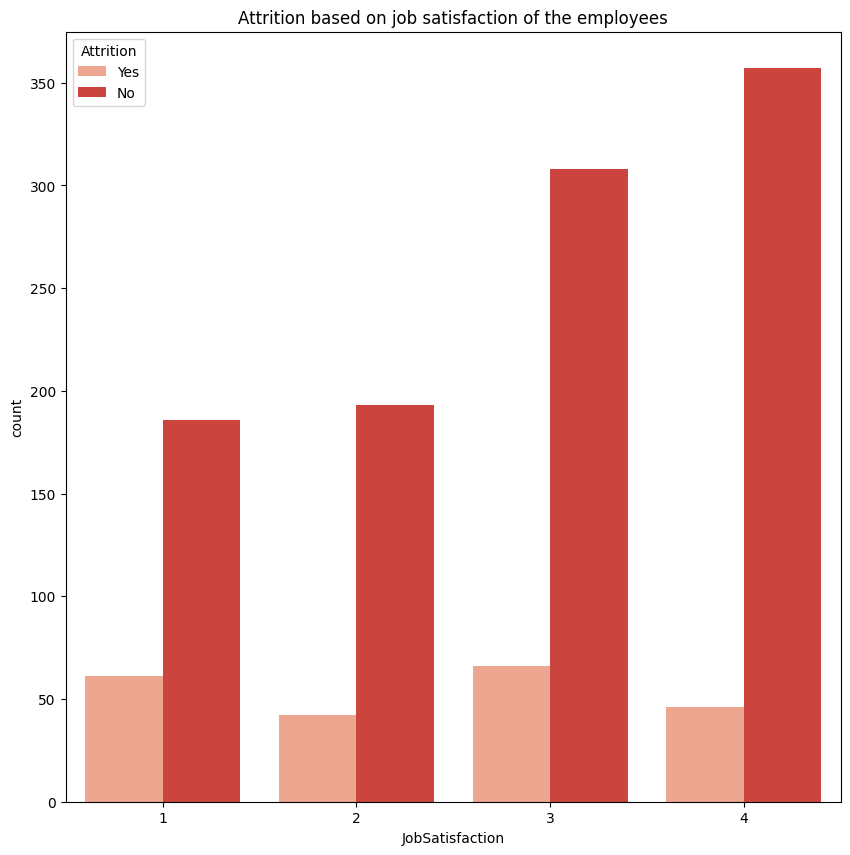

In [39]:
#Attrition based on Job satisfaction of the employees
plt.figure(figsize=(10,10))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=data,palette="Reds")
plt.title("Attrition based on job satisfaction of the employees")

Text(0.5, 1.0, 'Attrition count by overtime')

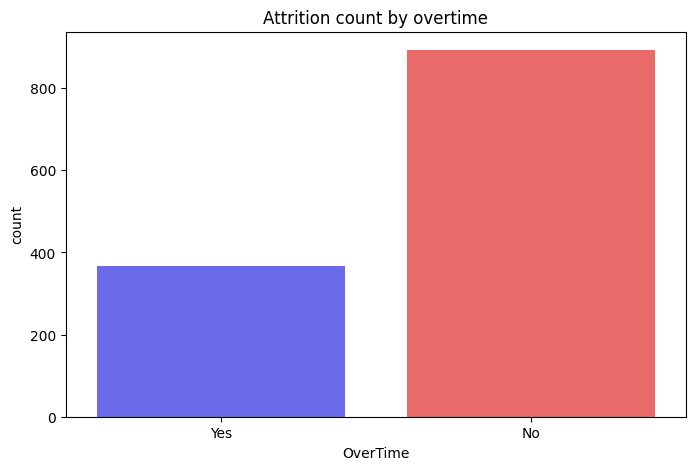

In [40]:
#Distribution of employees by the education field
plt.figure(figsize=(8,5))
sns.countplot(data=data,x=data['OverTime'], order=data['OverTime'].value_counts().sort_values(ascending=True).index, palette = 'seismic')
plt.title('Attrition count by overtime')

ENCODING CATEGORICAL VARIABLES

In [41]:
# One-Hot Encoding for nominal variables
data = pd.get_dummies(data, columns=['Department', 'EducationField', 'Gender', 'OverTime', 'MaritalStatus'])

In [42]:
data.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'OverTime_No', 'OverTime_Yes', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [43]:
data.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,Yes,1,2,2,4,5993,8,1,6,...,0,0,0,1,0,0,1,0,0,1
1,49,No,8,1,3,2,5130,1,3,10,...,0,0,0,0,1,1,0,0,1,0
2,37,Yes,2,2,4,3,2090,6,3,0,...,0,1,0,0,1,0,1,0,0,1
3,33,No,3,4,4,3,2909,1,3,8,...,0,0,0,1,0,0,1,0,1,0
5,32,No,2,2,4,4,3068,0,2,7,...,0,0,0,0,1,1,0,0,0,1


MODEL BUILDING

In [44]:
# Separate the target variable (Attrition) from the features
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=200)

In [46]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

In [47]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
# Predict the target values on the test set
y_pred = clf.predict(X_test)
y_pred

array(['No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.753968253968254


In [53]:
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.84      0.85       206
         Yes       0.34      0.37      0.35        46

    accuracy                           0.75       252
   macro avg       0.60      0.60      0.60       252
weighted avg       0.76      0.75      0.76       252



In [54]:
# Create and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[173  33]
 [ 29  17]]
